# Parkinson’s Disease Detection from Speech Data
----

### Name: Annika van Rooijen
### Matrikelnummer: s0592559

In [2]:
# Libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Problemstellung
----

### Was ist Parkinson?
Der Morbus Parkinson ist eine chronisch fortschreitende, neurodegenerative Erkrankung, die unter anderem zu steifen Muskeln, verlangsamten Bewegungen und unkontrollierbarem Zittern führt [1]. 

### Was sind Ursachen für die Erkrankung?
Das primäre Parkinson-Syndrom geht von einer bestimmten Hirnregion aus, der sogenannten schwarzen Substanz (Substantia nigra) im Mittelhirn. Hier befinden sich spezielle Nervenzellen, die den Nervenbotenstoff Dopamin produzieren und mit ihm mit anderen Nervenzellen kommunizieren. Dopamin ist unter anderem wichtig für die Bewegungssteuerung. Durch die Parkinson-Erkrankung sterben immer mehr dieser Nervenzellen ab, es entwickeln sich ein Dopaminmangel und ein Ungleichgewicht der Nervenbotenstoffe im Gehirn [1]. 

Die Ursache für den Zelltod bei der Parkinson-Krankheit ist noch nicht eindeutig nachgewiesen. der primäre Parkinson macht etwa 75 Prozent aller Parkinson-Syndrome aus. Von diesem „klassischen“ Parkinson unterscheidet man die sehr seltenen genetischen Formen von Parkinson, das „Sekundäre Parkinson-Syndrom“, das z.B. durch Medikamente, Vergiftungen oder bestimmte Erkrankungen ausgelöst werden kann, und das „Atypische Parkinson-Syndrom“ als Folge verschiedenartiger anderer neurodegenerativer Erkrankungen [1]. 

### Was sind die Symptome der Parkinson Erkrankung? 
Zu den typischen Symptomen gehören das Zittern, weitere Bewegungsstörungen wie Steifheit der Muskeln, verlangsamte Bewegungen und Gleichgewichtsstörungen. Zusätzliche Symptome können das „Einfrieren“ von Bewegungen, Schwierigkeiten beim Sprechen und Schlucken, Störungen der vegetativen Funktionen (z. B. Blutdruck und Verdauung), Schlafstörungen, Depressionen und geistige Beeinträchtigungen bis hin zur Demenz sein [1].

Sprach- und Stimmveränderungen treten häufig auf und können bereits Jahre vor den klassischen motorischen Symptomen beobachtet werden. Diese frühen Veränderungen bieten ein Potenzial für eine frühere Erkennung und Überwachung der Krankheit, was wichtig wäre, da Diagnosen derzeit meist erst erfolgen, nachdem erheblicher neuronaler Verlust stattgefunden hat. Dies sind für Ärzt:innen schwer nur durchs hören erkennbar [2]. 

Zu den Veränderungen zählen eine verminderte Lautstärke (Hypophonie), eine monotone Sprechweise mit reduzierter Tonhöhen- und Lautstärkenvariation, eine verlangsamte oder unregelmäßige Sprechgeschwindigkeit sowie eine unpräzise Artikulation, bei der insbesondere Konsonanten weniger deutlich gebildet werden. Zusätzlich zeigen sich veränderte Pausenmuster, eine eingeschränkte Prosodie ((Prosodie = Betonung, Rhythmus, Melodie der Sprache)) mit flacher Betonung und reduziertem emotionalem Ausdruck sowie eine verminderte Stimmstabilität mit Schwankungen in Tonhöhe und Stimmqualität. Bei komplexeren Sprachaufgaben können außerdem Wortfindungsprobleme und eine reduzierte sprachliche Vielfalt auftreten. Diese Veränderungen sind oft so subtil, dass sie klinisch allein durch Zuhören schwer erkennbar sind und erst durch objektive, akustische und digitale Analyseverfahren zuverlässig erfasst werden können [2].

### Zielstellung
Die manuelle Analyse von Sprachaufnahmen ist häufig zeitaufwendig und mit einer begrenzten Zuverlässigkeit verbunden. Vor diesem Hintergrund stellt sich die Frage, ob künstliche Intelligenz in der Lage ist, Sprach- und Frequenzdaten automatisiert auszuwerten, um Hinweise auf eine neurodegenerative Erkrankung wie Parkinson zu erkennen. Ziel ist die Entwicklung eines KI-Modells, das anhand von Sprachaufnahmen und akustischen Merkmalen eine Parkinson-Erkrankung  identifizieren kann.

## 2. Datenbeschaffung
----

Es gibt zahlreiche öffentlich verfügbare Datensätze zur Analyse von Parkinson anhand von Sprach- und Stimmmerkmalen. Die folgende Tabelle gibt einen Überblick über relevante Datensätze:

| Datensatzname | Datentyp | Inhalt | Größe / Umfang | Quelle |
|---------------|----------|--------|----------------|--------|
| UCI Parkinsons Dataset | Tabellarische Features | Frequenzmerkmale (Jitter, Shimmer, HNR, F0…) aus Sprachaufnahmen | 31 Personen, 195 Aufnahmen | https://archive.ics.uci.edu/dataset/174/parkinsons |
| UCI Parkinson Speech with Multiple Types of Audio | Tabellarische Features | Sustained Vowel, Wörter, Zahlen, Sätze | 40 Personen, mehrere hundert Audios | https://archive.ics.uci.edu/dataset/301/parkinson+speech+dataset |
| Figshare Parkinson Voice Samples | Audio (.wav) | Sustained Vowel /a/, Parkinson vs. Healthy | 100+ Aufnahmen | https://figshare.com/articles/dataset/23849127 |
| SJTU Parkinson Speech Dataset | Audio (.wav) | Verschiedene Sprachproben (Original-Speech) | > 150 Dateien | https://github.com/SJTU-YONGFU-RESEARCH-GRP/Parkinson-Patient-Speech-Dataset |
| Italian Parkinson’s Voice & Speech | Audio | Italienische Sprecher, Wörter, Vokale, Sätze | > 800 Aufnahmen, 65 Sprecher | https://ieee-dataport.org/open-access/italian-parkinsons-voice-and-speech |
| Mendeley Parkinson Acoustic Features | Tabellarische Features | Akustische Merkmale (MFCC, Jitter, Shimmer…) | ca. 200+ Einträge | https://data.mendeley.com/datasets/fjd6fcfkwn |
| NeuroVoz Parkinsonian Speech Corpus | Audio | Monologe, Vokale, Wörter, Wiederholungen, längere Sprache | 108 Sprecher |https://zenodo.org/records/10777657 (nicht öffentlich zugänglich)|
| PC-GITA Corpus | Audio | Spanische Sprecher, mehrere Sprachaufgaben, Parkinson vs. Healthy | 235 Sprecher | https://perception.csl.illinois.edu/PC-GITA.html (nicht öffentlich verfügbar)|
| MDVR-KCL Parkinson Voice Dataset | Audio | Sustained vowel phonation „a“, klinisch diagnostiziert | 40 Sprecher, 400+ Samples | https://www.kaggle.com/datasets/nutansingh/mdvr-kcl-dataset |
| mPower Parkinson Dataset | Audio + Sensorik | Smartphone-Sprachaufnahmen, longitudinal, Real-World-Daten | Tausende Teilnehmende | https://www.synapse.org/#!Synapse:syn4993293 |
| Parkinson Telemonitoring Dataset | Zeitreihen / Features | Sprachbasierte UPDRS-Messungen | 42 Personen, 5.875 Messungen | https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring |
| German Parkinson Speech Corpus (nicht offen) | Audio | Deutsche Sprache, klinische Studien | Variabel | Nur über Forschungskooperation |
| RBD / Prodromal PD Speech Datasets | Audio | Sprachdaten von Hochrisikogruppen (prodromales Parkinson) | Forschungsdaten | Nicht öffentlich |



Für dieses Projekt wurden bewusst zwei unterschiedliche, sich ergänzende Datensätze ausgewählt. Der **UCI Parkinsons Datensatz** [5] dient als Einstieg und Benchmark, da er bereits extrahierte akustische Frequenzmerkmale enthält und eine schnelle, methodisch saubere Evaluation klassischer Machine-Learning-Modelle ermöglicht. Aufbauend auf diesen Ergebnissen wird der **Figshare-Datensatz mit Roh-Audioaufnahmen** [4] verwendet, um realistische Sprachsignale zu analysieren und moderne, audio-basierte Ansätze umzusetzen. Die Analyse der Audiodaten erfolgt mithilfe von **Parselmouth** [3], einer Python-Schnittstelle zu Praat, wodurch eine präzise und reproduzierbare Extraktion phonetischer und akustischer Merkmale aus den Sprachaufnahmen möglich ist. Dieser zweistufige Ansatz erlaubt einen strukturierten Übergang von tabellarischen Features zu echten Sprachsignalen und erhöht die methodische Nachvollziehbarkeit des Projekts.


# 3. Globale Eigenschaften: Oxford Parkinson's Disease Detection Dataset
-----
Der Datensatz besteht aus 2 Tabellen:
1. `parkinsons.data`
2. `parkinsons_updr.data`

Für diese Arbeit wird ausschließlich der Datensatz *parkinson.data* verwendet, da dieser explizit für eine Klassifikationsaufgabe konzipiert ist und die Unterscheidung zwischen erkrankten und gesunden Personen ermöglicht. Der zweite Datensatz eignet sich hingegen primär für eine Regressionsaufgabe zur Vorhersage des UPDRS-Scores.

## 3.1. Variablenübersicht

Der Datensatz umfasst akustische, rauschbasierte sowie nichtlineare Merkmale, die unterschiedliche Aspekte der Stimmproduktion abbilden. Während Jitter- und Shimmer-Parameter kurzfristige Instabilitäten der Frequenz und Amplitude beschreiben, erfassen nichtlineare Maße wie RPDE, DFA oder PPE komplexe zeitliche Strukturen des Sprachsignals. 

| Variable | Beschreibung | Datentyp | Skalenniveau |
|--------|-------------|----------|--------------|
| `name` | Eindeutiger Bezeichner der Person und der jeweiligen Aufnahme (z. B. `phon_R01_S01_1`) | String-Object | Nominal |
| `MDVP:Fo(Hz)` | Durchschnittliche Grundfrequenz der Stimme (Fundamental Frequency) | Float | Kontinuierlich (metrisch) |
| `MDVP:Fhi(Hz)` | Maximale Grundfrequenz der Stimme | Float | Kontinuierlich (metrisch) |
| `MDVP:Flo(Hz)` | Minimale Grundfrequenz der Stimme | Float | Kontinuierlich (metrisch) |
| `MDVP:Jitter(%)` | Relative Variation der Grundfrequenz | Float | Kontinuierlich (metrisch) |
| `MDVP:Jitter(Abs)` | Absolute Variation der Grundfrequenz | Float | Kontinuierlich (metrisch) |
| `MDVP:RAP` | Relative Average Perturbation (Kurzzeit-Jitter-Maß) | Float | Kontinuierlich (metrisch) |
| `MDVP:PPQ` | Five-point Period Perturbation Quotient | Float | Kontinuierlich (metrisch) |
| `Jitter:DDP` | Durchschnittliche absolute Differenz der Periodenlängen | Float | Kontinuierlich (metrisch) |
| `MDVP:Shimmer` | Relative Amplitudenvariation | Float | Kontinuierlich (metrisch) |
| `MDVP:Shimmer(dB)` | Amplitudenvariation in Dezibel | Float | Kontinuierlich (metrisch) |
| `Shimmer:APQ3` | Drei-Punkte Amplituden-Perturbationsquotient | Float | Kontinuierlich (metrisch) |
| `Shimmer:APQ5` | Fünf-Punkte Amplituden-Perturbationsquotient | Float | Kontinuierlich (metrisch) |
| `MDVP:APQ` | Erweiterter Amplituden-Perturbationsquotient | Float | Kontinuierlich (metrisch) |
| `Shimmer:DDA` | Durchschnittliche absolute Differenz der Amplituden | Float | Kontinuierlich (metrisch) |
| `NHR` | Noise-to-Harmonics Ratio (Rauschanteil der Stimme) | Float | Kontinuierlich (metrisch) |
| `HNR` | Harmonics-to-Noise Ratio (Klangreinheit der Stimme) | Float | Kontinuierlich (metrisch) |
| `status` | Gesundheitsstatus: `1 = Parkinson`, `0 = gesund` | Integer| Nominal (binär) |
| `RPDE` | Recurrence Period Density Entropy (nichtlineares Dynamikmaß) | Float | Kontinuierlich (metrisch) |
| `DFA` | Detrended Fluctuation Analysis – fraktaler Skalierungsexponent | Float | Kontinuierlich (metrisch) |
| `spread1` | Nichtlineares Maß der Grundfrequenzvariation | Float | Kontinuierlich (metrisch) |
| `spread2` | Ergänzendes Maß zur Grundfrequenzvariation | Float | Kontinuierlich (metrisch) |
| `D2` | Korrelationsdimension (nichtlineare Dynamik) | Float | Kontinuierlich (metrisch) |
| `PPE` | Pitch Period Entropy – Unregelmäßigkeit der Grundfrequenz | Float | Kontinuierlich (metrisch) |


---

### 3.2. Zielvariable

- **`status`**  
  - `0` → gesunde Kontrollperson  
  - `1` → Parkinson-Erkrankung  

Ziel des Datensatzes ist die binäre Klassifikation von Parkinson-Erkrankten und gesunden Personen anhand von biomedizinischen Voice-Features. 



In [3]:
df = pd.read_csv('data/oxford_PD_dataset/parkinsons.data')

In [4]:
# 195 rows, 24 colums
df.shape

(195, 24)

In [5]:
# keine NaN Values
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 3.3. Feature Extraction
Zur Verbesserung der Analyse wurde die Spalte `name` in `record_id`umbenannt. Zusätzlich wurden aus dem zusammengesetzten Aufnahme-Identifikator weitere relevante Informationen extrahiert und in separate Spalten überführt.

In [8]:
# name-Spalte umbenennem
df = df.rename(columns={'name': 'record_id'})

In [9]:
# subject number aus name-Spalte extrahieren

df['subject_number'] = (
    df['record_id']
    .str.extract(r'_S(\d+)_')
    .astype(int)
)


In [10]:
# Nummer der Aufnahme extrahieren 
df['record_number'] = (
    df['record_id']
    .str.extract(r'_(\d+)$')
    .astype(int)
)

In [11]:
# 'phon_' wird entfernt für bessere Lesbarkeit
df['record_id'] = df['record_id'].str.replace('phon_', '', regex=False)


In [12]:
id_cols = ['record_id', 'subject_number', 'record_number']
target_col = ['status']
feature_cols = [c for c in df.columns if c not in id_cols + target_col]

df= df[id_cols + feature_cols + target_col]

In [13]:
df.head()

,record_id,subject_number,record_number,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,R01_S01_1,1,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,R01_S01_2,1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,R01_S01_3,1,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,R01_S01_4,1,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,R01_S01_5,1,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# 4. Exploratory Data Analysis
------

In [14]:
# Histogram Plotfunktion für einfache Wiederverwendbarkeit

def plot_histogram_comparison(df, column, bin_a, bin_b):

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    sns.histplot(
        data=df,
        x=column,
        bins=bin_a,
        kde=True,
        ax=axes[0]
    )
    axes[0].set_title(f'{column} – {bin_a} Klassen')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Häufigkeit')

    sns.histplot(
        data=df,
        x=column,
        bins=bin_b,
        kde=True,
        ax=axes[1]
    )
    axes[1].set_title(f'{column} – {bin_b} Klassen')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()


In [15]:
def lagemasse(column):
    return pd.DataFrame({
        'min': [column.min()],
        'Q1': [column.quantile(0.25)],
        'median': [column.median()],
        'mean': [column.mean()],
        'mode': [column.mode().iloc[0]],
        'Q3': [column.quantile(0.75)],
        'max': [column.max()]
    }, index=[column.name])


In [16]:
def streumasse(column):
    return pd.DataFrame({
        'range': column.max() - column.min(),
        'IQR': column.quantile(0.75) - column.quantile(0.25),
        'variance': column.var(),
        'std_dev': column.std(),
        'skewness': column.skew(),
        'kurtosis': column.kurt()
    }, index=[column.name])

## 4.1. Lagemaße
Berechnung von Median, Modus, Arithmetisches Mittel, unteres und oberes Quartil, sowohl das Minimum und Maximum der einzelnen Variablen. 
Obwohl für alle kontinuierlichen Variablen ein Modus berechnet werden konnte, ist dieser aufgrund der Messauflösung und der kontinuierlichen Natur der Daten nur eingeschränkt interpretierbar [6].

In [17]:
# einen stats-DataFrame erstellen, um eine leichter Visualisierung zu erreichen werden die daten auf die 
feature_df = df[feature_cols]

stats = pd.DataFrame({
    'min': feature_df.min(),
    'Q1': feature_df.quantile(0.25),
    'median': feature_df.median(),
    'mean': feature_df.mean(),
    'mode' : feature_df.mode().iloc[0],
    'Q3': feature_df.quantile(0.75),
    'max': feature_df.max()
})

stats.round(3)

,min,Q1,median,mean,mode,Q3,max
MDVP:Fo(Hz),88.333,117.572,148.790,154.229,88.333,182.769,260.105
MDVP:Fhi(Hz),102.145,134.862,175.829,197.105,102.145,224.206,592.030
MDVP:Flo(Hz),65.476,84.291,104.315,116.325,65.476,140.019,239.170
MDVP:Jitter(%),0.002,0.003,0.005,0.006,0.004,0.007,0.033
MDVP:Jitter(Abs),0.000,0.000,0.000,0.000,0.000,0.000,0.000
MDVP:RAP,0.001,0.002,0.002,0.003,0.002,0.004,0.021
MDVP:PPQ,0.001,0.002,0.003,0.003,0.003,0.004,0.020
Jitter:DDP,0.002,0.005,0.007,0.010,0.005,0.012,0.064
MDVP:Shimmer,0.010,0.017,0.023,0.030,0.014,0.038,0.119
MDVP:Shimmer(dB),0.085,0.148,0.221,0.282,0.154,0.350,1.302


In [18]:
# durch das Runden auf die 3. Nachkommastelle geht diese Variable verloren 
stats.iloc[4]

min       0.000007
Q1        0.000020
median    0.000030
mean      0.000044
mode      0.000030
Q3        0.000060
max       0.000260
Name: MDVP:Jitter(Abs), dtype: float64

## 4.2. Streuungsmaße
Berechnung von Spannweite, IQR, Varianz, Standardabweichung, Schiefe und Wölbung aller Variablen

In [19]:
stats = pd.DataFrame({
    'range': feature_df.max() - feature_df.min(),
    'IQR': feature_df.quantile(0.75) - feature_df.quantile(0.25),
    'variance': feature_df.var(),
    'std_dev': feature_df.std(),
    'skewness': feature_df.skew(),
    'kurtosis': feature_df.kurt()
})

stats


,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Fo(Hz),171.772000,65.197000,1.713137e+03,41.390065,0.591737,-0.627898
MDVP:Fhi(Hz),489.885000,89.343000,8.370703e+03,91.491548,2.542146,7.627241
MDVP:Flo(Hz),173.694000,55.727500,1.894113e+03,43.521413,1.217350,0.654615
MDVP:Jitter(%),0.031480,0.003905,2.350440e-05,0.004848,3.084946,12.030939
MDVP:Jitter(Abs),0.000253,0.000040,1.212565e-09,0.000035,2.649071,10.869043
MDVP:RAP,0.020760,0.002175,8.807685e-06,0.002968,3.360708,14.213798
MDVP:PPQ,0.018660,0.002095,7.611952e-06,0.002759,3.073892,11.963922
Jitter:DDP,0.062290,0.006520,7.926954e-05,0.008903,3.362058,14.224762
MDVP:Shimmer,0.109540,0.021380,3.555839e-04,0.018857,1.666480,3.238308
MDVP:Shimmer(dB),1.217000,0.201500,3.797716e-02,0.194877,1.999389,5.128193


## 4.3. Inhaltliche Beschreibung der einzelnen Variablen

### Zielvariable: status
Der Datensatz weist eine deutliche Klassenungleichverteilung auf. Sowohl auf Personenebene als auch auf Aufnahmeebene sind Parkinson-Patient:innen etwa dreimal so häufig vertreten wie gesunde Kontrollpersonen. Von insgesamt 195 Sprachaufnahmen stammen 147 von an Parkinson erkrankten Personen, während lediglich 48 Aufnahmen von gesunden Personen vorliegen. Diese ausgeprägte Klassenimbalance stellt eine Herausforderung für Klassifikationsmodelle dar.


In [44]:
# Anzahl Gesunder vs. kranker Personen 
subjects = df[['subject_number', 'status']].drop_duplicates()
count = subjects['status'].value_counts()

count

1    24
0     8
Name: status, dtype: int64

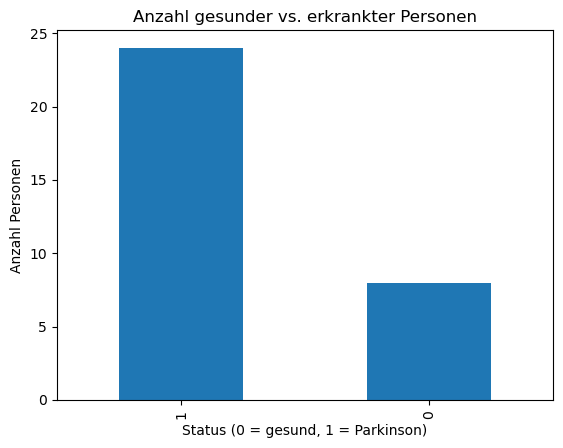

In [46]:
count.plot(kind='bar')
plt.title('Anzahl gesunder vs. erkrankter Personen')
plt.xlabel('Status (0 = gesund, 1 = Parkinson)')
plt.ylabel('Anzahl Personen')
plt.show()


In [43]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64


### Grundfrequenz (Pitch)
➡️ Zusammen beschreiben die drei Grundfrequenz-Merkmale (Durchschnitt, Minimum und Maximum): Pitch-Level und Pitch-Variabilität

**MDVP (Multidimensional Voice Program):**
ist eine computergestützte Software zur objektiven akustischen Analyse der Stimmqualität

#### MDVP:Fo(Hz)
- Durchschnittliche Grundfrequenz (Pitch)
- Entspricht der wahrgenommenen Tonhöhe
- Parkinson-Patient:innen zeigen oft instabilere Pitch-Werte

In [20]:
lagemasse(df["MDVP:Fo(Hz)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Fo(Hz),88.333,117.572,148.79,154.228641,88.333,182.769,260.105


Die durchschnittliche Grundfrequenz (MDVP:Fo) weist einen Wertebereich von 88.3 Hz bis 260.1 Hz auf. Der Median liegt bei 148.8 Hz, während der Mittelwert mit 154.2 Hz leicht darüber liegt, was auf eine moderate Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 117.6 Hz und dem dritten Quartil bei 182.8 Hz.

In [21]:
streumasse(df["MDVP:Fo(Hz)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Fo(Hz),171.772,65.197,1713.13746,41.390065,0.591737,-0.627898


Die Spannweite der durchschnittlichen Grundfrequenz beträgt 171.8 Hz, was auf eine hohe Variabilität hinweist. Der Interquartilsabstand von 65.2 Hz zeigt, dass auch die mittleren 50 % der Werte deutlich streuen. Die Standardabweichung liegt bei 41.4 Hz und bestätigt die ausgeprägte Streuung um den Mittelwert. Die positive Schiefe (0.59) weist auf eine leicht rechtsschiefe Verteilung hin, während die negative Kurtosis (−0.63) auf eine flachere Verteilungsform ohne ausgeprägte Ausreißer hindeutet.

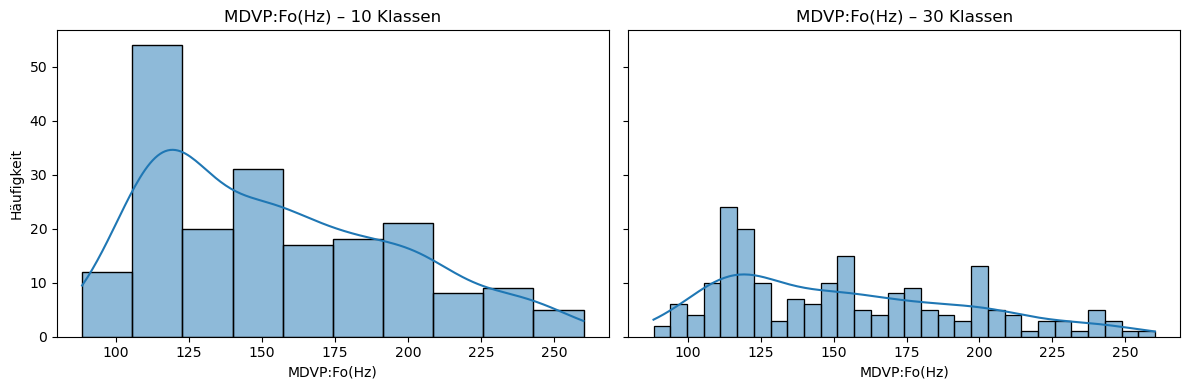

In [22]:
plot_histogram_comparison(df, 'MDVP:Fo(Hz)', 10, 30)

#### MDVP:Fhi(Hz)
- Maximale Grundfrequenz
- Zeigt die obere Spannweite der Stimme

In [23]:
lagemasse(df["MDVP:Fhi(Hz)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Fhi(Hz),102.145,134.8625,175.829,197.104918,102.145,224.2055,592.03


Die maximale Grundfrequenz (MDVP:Fhi) weist einen sehr breiten Wertebereich von 102.1 Hz bis 592.0 Hz auf. Der Median liegt bei 175.8 Hz, während der Mittelwert mit 197.1 Hz deutlich höher ausfällt, was auf eine ausgeprägte Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 134.9 Hz und dem dritten Quartil bei 224.2 Hz. Insgesamt deuten die Lagemaße auf eine hohe Variabilität der maximalen Grundfrequenz hin, wobei insbesondere einzelne sehr hohe Werte den Mittelwert nach oben verschieben.

In [24]:
streumasse(df["MDVP:Fhi(Hz)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Fhi(Hz),489.885,89.343,8370.703289,91.491548,2.542146,7.627241


Die maximale Grundfrequenz weist mit einer Spannweite von 489.9 Hz eine sehr hohe Streuung auf, was auf ausgeprägte individuelle Unterschiede hinweist. Der IQR beträgt 89.3 Hz und zeigt, dass bereits die mittleren 50 % der Werte stark variieren. Die Standardabweichung von 91.5 Hz bestätigt diese hohe Variabilität um den Mittelwert. Die stark positive Schiefe (2.54) deutet auf eine ausgeprägt rechtsschiefe Verteilung hin, während die hohe Kurtosis (7.63) auf eine starke Ausreißerlastigkeit mit einzelnen extrem hohen Werten schließen lässt.

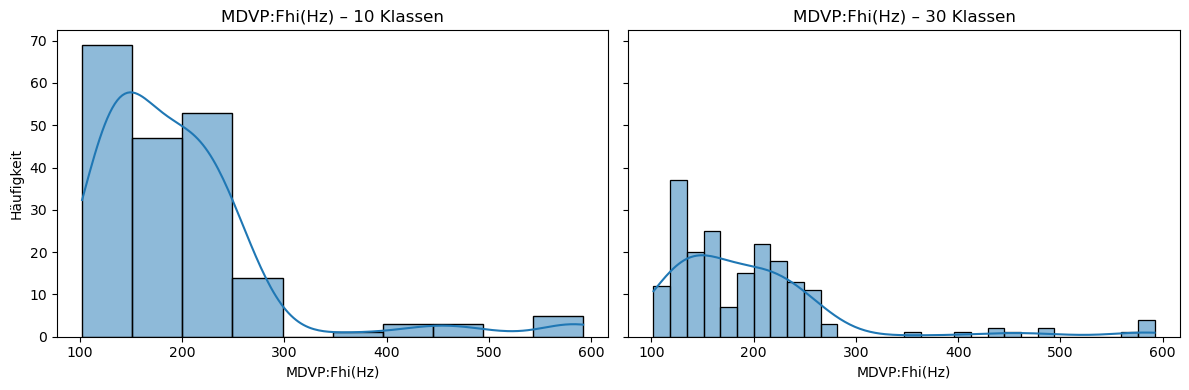

In [25]:
plot_histogram_comparison(df, 'MDVP:Fhi(Hz)', 10, 30)

#### MDVP:Flo(Hz)
- Minimale Grundfrequenz
- Zeigt die untere Spannweite

In [26]:
lagemasse(df["MDVP:Flo(Hz)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Flo(Hz),65.476,84.291,104.315,116.324631,65.476,140.0185,239.17


Die minimale Grundfrequenz (MDVP:Flo) liegt in einem Wertebereich von 65.5 Hz bis 239.2 Hz. Der Median beträgt 104.3 Hz, während der Mittelwert mit 116.3 Hz darüber liegt, was auf eine rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 84.3 Hz und dem dritten Quartil bei 140.0 Hz. Insgesamt zeigen die Lagemaße eine breite Verteilung der minimalen Grundfrequenz, wobei höhere Einzelwerte den Mittelwert nach oben verschieben.

In [27]:
streumasse(df["MDVP:Flo(Hz)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Flo(Hz),173.694,55.7275,1894.113405,43.521413,1.21735,0.654615


Die minimale Grundfrequenz weist mit einer Spannweite von 173.7 Hz eine ausgeprägte Streuung auf. Der Interquartilsabstand von 55.7 Hz zeigt, dass auch die mittleren 50 % der Werte deutlich variieren. Die Standardabweichung beträgt 43.5 Hz und bestätigt eine hohe Streuung um den Mittelwert. Die positive Schiefe (1.22) deutet auf eine rechtsschiefe Verteilung hin, während die leicht positive Kurtosis (0.65) auf eine moderat ausreißerlastige Verteilungsform schließen lässt.

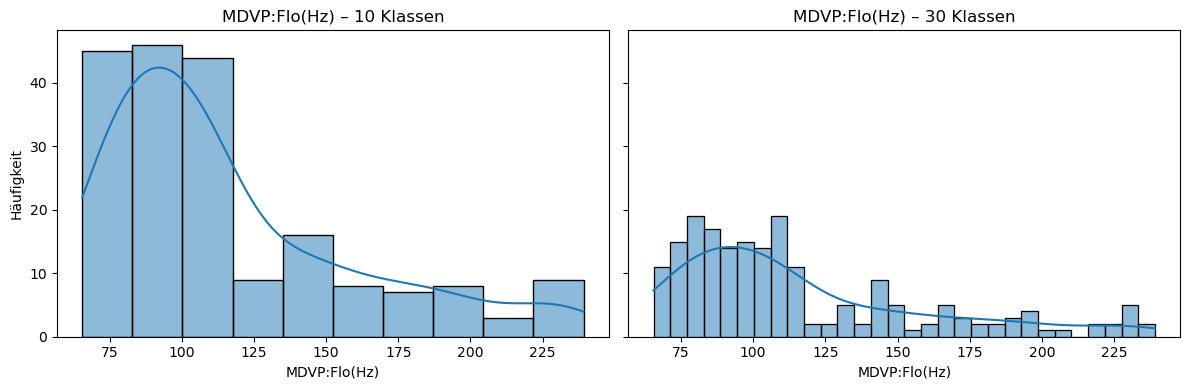

In [28]:
plot_histogram_comparison(df, 'MDVP:Flo(Hz)', 10, 30)

### Jitter – Frequenzinstabilität

Jitter misst minimale Schwankungen der Tonhöhe von Periode zu Periode.
Hoher Jitter bedeutet eine unregelmäßige Stimmlippenschwingung oder anders formuliert: Ein hoher Jitter-Wert weist auf eine instabile Stimme hin. Das bedeutet Menschen mit Parkinson können einen höheren Jitter.

Während Jitter (Abs) die absolute zeitliche Schwankung der Periodendauer beschreibt, erfasst Jitter (%) diese Schwankung relativ zur mittleren Periodendauer und ermöglicht dadurch eine bessere Vergleichbarkeit zwischen Sprecher:innen.

#### MDVP:Jitter(%)
- Relative Schwankung der Grundfrequenz
- Normiert und dadurch gut vergleichbar

In [29]:
lagemasse(df["MDVP:Jitter(%)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Jitter(%),0.00168,0.00346,0.00494,0.00622,0.00369,0.007365,0.03316


Der relative Jitter (MDVP:Jitter(%)) weist überwiegend niedrige Werte auf, mit einem Median von 0.00494 und einem Mittelwert von 0.00622. Der Mittelwert liegt deutlich über dem Median, was auf eine ausgeprägte Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 0.00346 und dem dritten Quartil bei 0.00737. Das Maximum von 0.03316 liegt deutlich oberhalb dieses Bereichs und deutet auf einzelne Aufnahmen mit stark erhöhter Stimminstabilität hin.

In [30]:
streumasse(df["MDVP:Jitter(%)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Jitter(%),0.03148,0.003905,0.000024,0.004848,3.084946,12.030939


Die Spannweite des relativen Jitters beträgt 0.03148, während der Interquartilsabstand mit 0.00391 vergleichsweise klein ist, was auf eine dichte Konzentration der meisten Werte im unteren Bereich hindeutet. Die Standardabweichung von 0.00485 zeigt dennoch eine relevante Streuung um den Mittelwert. Die stark positive Schiefe (3.08) und die hohe Kurtosis (12.03) weisen auf eine stark rechtsschiefe, ausreißerlastige Verteilung mit wenigen extrem hohen Jitter-Werten hin.

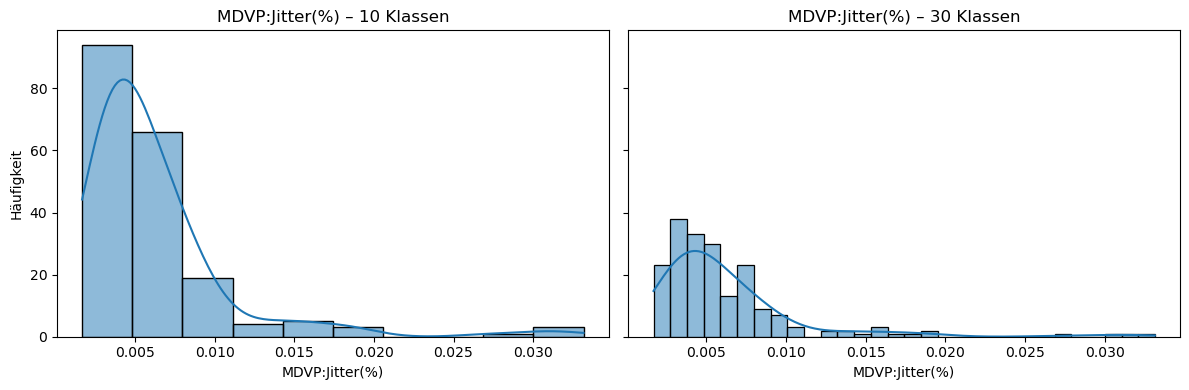

In [37]:
plot_histogram_comparison(df, 'MDVP:Jitter(%)', 10, 30)

#### MDVP:Jitter(Abs)
- Absolute Schwankung (in Sekunden)
- Stärker von der Grundfrequenz abhängig

In [38]:
lagemasse(df["MDVP:Jitter(Abs)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Jitter(Abs),0.000007,0.00002,0.00003,0.000044,0.00003,0.00006,0.00026


Der absolute Jitter (MDVP:Jitter(Abs)) weist insgesamt sehr kleine Werte auf. Der Median liegt bei 0.00003 Sekunden, während der Mittelwert mit 0.000044 Sekunden etwas höher ausfällt. Diese Differenz deutet auf eine rechtsschiefe Verteilung hin. Die mittleren 50 % der Werte befinden sich zwischen 0.00002 und 0.00006 Sekunden, während das Maximum von 0.00026 Sekunden auf einzelne Aufnahmen mit deutlich erhöhter Stimminstabilität hinweist.

In [39]:
streumasse(df["MDVP:Jitter(Abs)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Jitter(Abs),0.000253,0.00004,1.212565e-09,0.000035,2.649071,10.869043


Die Spannweite des absoluten Jitters beträgt 0.000253 Sekunden, während der Interquartilsabstand mit 0.00004 Sekunden vergleichsweise klein ist, was auf eine starke Konzentration der meisten Werte im unteren Bereich hinweist. Die Standardabweichung von 0.000035 Sekunden zeigt dennoch eine messbare Streuung um den Mittelwert. Die deutlich positive Schiefe (2.65) und die hohe Kurtosis (10.87) weisen auf eine stark rechtsschiefe, ausreißerlastige Verteilung hin, die durch wenige extrem hohe Jitter-Werte geprägt ist.

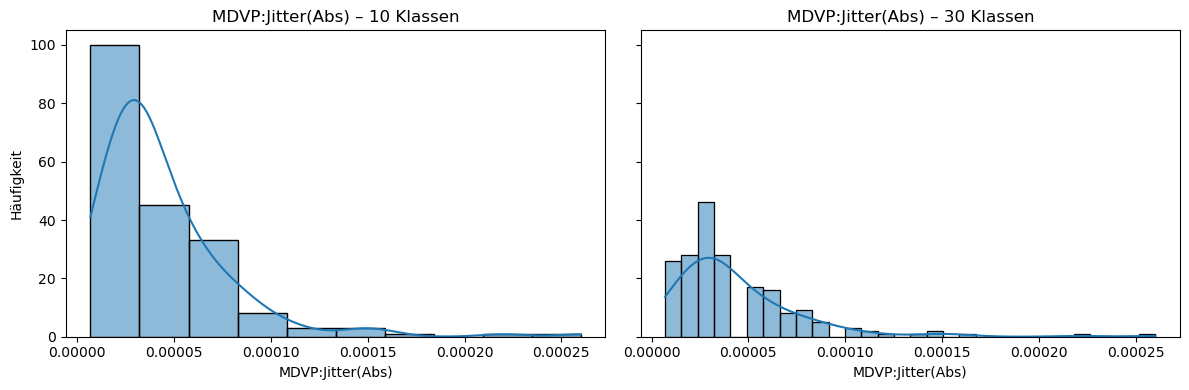

In [40]:
plot_histogram_comparison(df, 'MDVP:Jitter(Abs)', 10, 30)


MDVP:RAP

Durchschnittliche Abweichung über 3 Perioden

Glättet kurzfristige Ausreißer

MDVP:PPQ

Abweichung über 5 Perioden

Noch robuster als RAP

Jitter:DDP

Dreifacher RAP-Wert

Verstärkt kurzfristige Unregelmäßigkeiten

➡️ Hohe Jitter-Werte sind typisch für Parkinson-Dysphonie.

4️⃣ Shimmer – Amplitudeninstabilität

Shimmer misst Schwankungen der Lautstärke zwischen Schwingungsperioden.

MDVP:Shimmer

Relative Amplitudenvariation

MDVP:Shimmer(dB)

Amplitudenvariation in Dezibel

Logarithmische Skala

Shimmer:APQ3, Shimmer:APQ5

Mittelung über 3 bzw. 5 Perioden

Robust gegen Einzelspikes

MDVP:APQ

Erweiterte APQ-Version

Größeres Zeitfenster

Shimmer:DDA

Verstärkte absolute Amplitudenänderung

➡️ Erhöhte Shimmer-Werte deuten auf eingeschränkte Stimmkontrolle hin.

5️⃣ Rauschmaße

Diese Merkmale beschreiben das Verhältnis von harmonischem Klang zu Rauschen.

NHR (Noise-to-Harmonics Ratio)

Verhältnis von Rauschen zu harmonischen Anteilen

Je höher, desto verrauschter die Stimme

HNR (Harmonics-to-Noise Ratio)

Umgekehrtes Verhältnis

Je höher, desto klarer die Stimme

➡️ Parkinson-Stimmen zeigen oft:

höheres NHR

niedrigeres HNR

6️⃣ Nichtlineare & komplexe Dynamik

Diese Merkmale erfassen feinere zeitliche Strukturen, die lineare Maße nicht abbilden können.

RPDE

Misst die Unregelmäßigkeit der Schwingungsperioden

Höher = weniger periodisch

DFA

Fraktaler Skalierungsexponent

Beschreibt Langzeitkorrelationen

Zeigt, wie stabil ein Signal über Zeit ist

D2

Korrelationsdimension

Maß für die dynamische Komplexität des Signals

PPE

Pitch Period Entropy

Misst Unvorhersagbarkeit der Tonhöhe

spread1, spread2

Nichtlineare Maße zur Pitch-Verteilung

Beschreiben Streuung und Form der Frequenzvariation

➡️ Diese Features sind besonders nützlich für Machine Learning, da sie nicht-triviale Muster erfassen.

# 4. Featrure Engineering
## 4.1. Train-Test-Split
## 4.2. Feature Preprocessing

# 5. Modelltraining

# 6. Modellevaluierung
Stratifiziertes Sampling
train_test_split(..., stratify=y)

DecisionTreeClassifier(class_weight='balanced')

Precision

Recall

F1-Score

ROC-AUC

# 7. Bonus
SMOTE --> Oversampling
Class Weights --> Modell „bestraft“ Fehler bei Gesunden stärker
Feature Selection (Decission Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df[feature_cols]
y = df['status']

# Train/Test Split (stratifiziert!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# SMOTE nur auf Trainingsdaten
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 8. Fazit


# 9. Quellen
**[1]** Deutsche Gesellschaft für Parkinson und Bewegungsstörungen e. V. (o. J.). *Die Parkinson-Krankheit*. Abgerufen am *29. Dezember 2025*, von https://parkinson-gesellschaft.de/fuer-betroffene/die-parkinson-krankheit/

**[2]** Cao, F., Vogel, A. P., Gharahkhani, P., & Renteria, M. E. (2025). *Speech and language biomarkers for Parkinson’s disease prediction, early diagnosis and progression.* *npj Parkinson’s Disease, 11*(57). https://doi.org/10.1038/s41531-025-00913-4

**[3]** Jadoul, Y., Thompson, B., & de Boer, B. (2018). *Introducing Parselmouth: A Python interface to Praat*. *Journal of Phonetics, 71*, 1–15. [https://doi.org/10.1016/j.wocn.2018.07.001](https://doi.org/10.1016/j.wocn.2018.07.001) 

**[4]** Sakar, C. O., Serbes, G., & Gunduz, A. (2023). *Voice samples for patients with Parkinson’s disease and healthy controls* [Data set]. Figshare. [https://doi.org/10.6084/m9.figshare.23849127](https://doi.org/10.6084/m9.figshare.23849127)

**[5]** A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson.s disease progression by non-invasive speech tests',IEEE Transactions on Biomedical Engineering [https://doi.org/10.24432/C56C7T](https://doi.org/10.24432/C56C7T)

**[6]** DataCamp. (n.d.). Measures of central tendency in Python. Abgerufen am 6. Januar 2026, von https://www.datacamp.com/de/tutorial/central-tendency

**[7]** Yulianti, Y., Syapariyah, A. N., & Saifudin, A. (2020). Feature selection techniques to choose the best features for Parkinson’s disease predictions based on decision tree. Journal of Physics: Conference Series, 1477(3), 032008. https://doi.org/10.1088/1742-6596/1477/3/032008
